# **Model Summary: Used Car Price Prediction**


### 🔹 **Goal**

To develop a **Lasso Regression model** that predicts the **selling price of used cars** based on their technical and usage features, while also **automatically selecting the most relevant features**.

---


### 🔹 **Problem Type**

* **Supervised Learning**
* **Regression Task**
* Uses **Lasso (L1 Regularized) Linear Regression**

---

### 🔹 **Input Features (Independent Variables)**

From the [CarDekho Dataset](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho):

| Feature         | Description                                   |
| --------------- | --------------------------------------------- |
| `Car_Name`      | Brand/Model name (may be dropped or encoded)  |
| `Year`          | Year of manufacture (used to compute car age) |
| `Present_Price` | Current showroom price (in lakhs ₹)           |
| `Kms_Driven`    | Distance driven (in kilometers)               |
| `Fuel_Type`     | Petrol / Diesel / CNG                         |
| `Seller_Type`   | Dealer / Individual                           |
| `Transmission`  | Manual / Automatic                            |
| `Owner`         | Number of previous owners                     |

---

### 🔹 **Target Variable (Output)**

| Feature         | Description                                                 |
| --------------- | ----------------------------------------------------------- |
| `Selling_Price` | Price at which the owner wants to sell the car (in lakhs ₹) |

---

### 🔹 **Data Source**

* 📂 **Kaggle Dataset**: [Vehicle Dataset from CarDekho](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho)
* Contains around **300–400 records** of used cars listed on CarDekho

---

### 🔹 **Main Techniques Used**

* **One-Hot Encoding** for categorical features
* **Feature Scaling** for Lasso regression stability
* **Train-Test Split** (typically 80–20)
* **Lasso Regression** with hyperparameter tuning (alpha)
* **Evaluation**: R² Score, MSE, and model coefficients analysis

---

### 🔹 **Expected Output**

* A trained **Lasso model** that:

  * Predicts car resale price from new input data
  * Highlights which features most influence pricing (automatically sets irrelevant ones to zero)

---

### 🔹 **Use Case in Automotive Context**

* **OEMs / Dealerships** can use it to **predict resale values** during exchange programs
* **Consumers** can get fair price estimates
* **Embedded ECUs or cloud services** can deploy it in **dealer apps**

---

Let me know when you're ready, and we’ll begin Step 1: **Load and explore the dataset in Python**.


Great question! Let’s explain **why Lasso Regression is a smart choice** for this car resale price prediction task — especially in your **automotive #JD context**.

---

## ✅ Why Lasso is Better for This Model

---

### 1. **Feature Selection Built-In**

> 🔹 Lasso automatically **removes irrelevant features** by shrinking their weights to **zero**.

In your dataset:

* Fields like `Car_Name`, `Owner`, or some encoded categories might not help much.
* Lasso will **automatically eliminate these** from the model.

✅ This leads to:

* Simpler model
* Easier interpretation
* Better generalization (less overfitting)

---

### 2. **Prevents Overfitting**

> 🔹 Used car price is influenced by **some, but not all features**.

* Lasso adds **L1 regularization**:

  $$
  \text{Loss} = \text{Error} + \alpha \sum |w_i|
  $$
* This keeps the model from learning “noise” in the data.

✅ Important for small/medium datasets (like CarDekho), where overfitting is a risk.

---

### 3. **Interpretable Model**

> 🔹 You can **see which features matter** — because unimportant ones will have **zero weight**.

This helps:

* Dealerships understand **key pricing drivers**
* You explain model behavior clearly (important in embedded or dealer software)

---

### 4. **Better than Ridge for Feature Pruning**

* Ridge (L2) keeps **all features**, just shrinks them
* Lasso **drops** irrelevant features completely — ideal for pricing, where only a few features may dominate (e.g., Present\_Price, Year, Transmission)

---

### 5. **Lightweight Model — Good for Deployment**

* Smaller model = **less memory, faster inference**
* Can run on **local dealership software**, or **embedded systems with limited compute**

---


# **Step 1 : Data Download**

In [10]:
import pandas as pd

# Replace with your actual filename if different
df = pd.read_csv('/content/car data.csv')
#df = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')
#df = pd.read_csv('/content/Car details v3.csv')
#df = pd.read_csv('/content/car details v4.csv')

# Preview the data
df.head()





,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# **Step 2: Data Exploration & Cleaning**




In [11]:
# Basic info
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())
print("\n\n\n\n")
# Preview unique values for each column (especially categoricals)
for col in df.columns:
    print(f"{col}: {df[col].unique()[:5]}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB

Missing Values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64





Car_Name: ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift']
Year: [2014 2013 2017 2011 2018]
Selling_Price: [3.35 4.75 7.25 2.85 4.6 ]
Present_Price: [5

# **Step 3: Preprocessing**

| Column          | Type   | Action                          |
| --------------- | ------ | ------------------------------- |
| `Car_Name`      | object | Drop                            |
| `Year`          | int    | Convert to `Car_Age`, then drop |
| `Selling_Price` | float  | Target (y)                      |
| `Present_Price` | float  | Keep                            |
| `Kms_Driven`    | int    | Keep                            |
| `Fuel_Type`     | object | Encode                          |
| `Seller_Type`   | object | Encode                          |
| `Transmission`  | object | Encode                          |
| `Owner`         | int    | Keep (already numeric) ✅        |


In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd

# Step 1: Create Car_Age
df['Car_Age'] = 2024 - df['Year']

df.drop(['Car_Name', 'Year'], axis=1, inplace=True) # axis=1, drops columns

# Step 2: Define features and target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Step 3: Define column types
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
numerical_cols = ['Present_Price', 'Kms_Driven', 'Owner', 'Car_Age']

# Step 4: Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

# Step 5: Fit-transform features
X_processed = preprocessor.fit_transform(X)

# Optional: Get final feature names
feature_names = (
    numerical_cols +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
)

# Convert to DataFrame
X_final = pd.DataFrame(X_processed.toarray() if hasattr(X_processed, 'toarray') else X_processed,
                       columns=feature_names)

# Preview
X_final.head()


,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,-0.236215,-0.256224,-0.174501,-0.128897,0.0,1.0,0.0,1.0
1,0.221505,0.155911,-0.174501,0.217514,1.0,0.0,0.0,1.0
2,0.257427,-0.773969,-0.174501,-1.168129,0.0,1.0,0.0,1.0
3,-0.403079,-0.817758,-0.174501,0.910335,0.0,1.0,0.0,1.0
4,-0.087890,0.141743,-0.174501,-0.128897,1.0,0.0,0.0,1.0


# **Step 4: Training the Lasso Regression model**

In [13]:
# Step 6: Train and Evaluate Lasso Regression

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Split the final preprocessed data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Initialize Lasso model (alpha = 0.1)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred = lasso_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Show selected features (non-zero coefficients)
lasso_coefficients = pd.Series(lasso_model.coef_, index=X_final.columns)
print("\nSelected Features (non-zero coefficients):")
print(lasso_coefficients[lasso_coefficients != 0])


Mean Squared Error (MSE): 3.6742945621389325
R² Score: 0.8404948414092756

Selected Features (non-zero coefficients):
Present_Price             3.942765
Kms_Driven               -0.054747
Owner                    -0.165430
Car_Age                  -1.069828
Fuel_Type_Diesel          1.067774
Seller_Type_Individual   -0.716411
Transmission_Manual      -0.505027
dtype: float64


## **Results Interpretaion**




### 📊 **Model Performance**

| Metric                       | Value  |
| ---------------------------- | ------ |
| **Mean Squared Error (MSE)** | `3.67` |
| **R² Score**                 | `0.84` |

🧠 This means the model can explain **84% of the variation** in resale price — very strong performance for a small dataset!

---

### 🎯 **Selected Features (Lasso Kept These)**

| Feature                  | Coefficient |
| ------------------------ | ----------- |
| Present\_Price           | +3.94       |
| Kms\_Driven              | –0.05       |
| Owner                    | –0.17       |
| Car\_Age                 | –1.07       |
| Fuel\_Type\_Diesel       | +1.07       |
| Seller\_Type\_Individual | –0.72       |
| Transmission\_Manual     | –0.51       |

🧠 These features **directly affect resale price**:

* 🚗 **Higher Present\_Price → higher Selling\_Price**
* 📉 **Older cars → lower resale**
* ⛽ Diesel vehicles have **higher resale value**
* 🤝 Selling through individual → slightly lowers price
* ⚙️ Manual transmission → also lowers price slightly

---

## 🔢 Coefficient for `Fuel_Type_Diesel`:

---

## 🔍 Look at the Lasso Coefficient:

```
Fuel_Type_Diesel → +1.067774
```

### 🧠 What This Means:

* `Fuel_Type_Diesel` is a **binary (0 or 1)** column created by OneHotEncoder.
* So:

  * If the car is **Diesel**, this column = 1 → model adds **+1.07** to predicted price
  * If it’s **not Diesel** (i.e., dropped base category, likely Petrol), it contributes **0**

---

## ✅ Interpretation:

> Holding all other features constant:
>
> * If the car is Diesel → predicted resale price **increases by \~1.07 lakh ₹** compared to Petrol.

Hence:

> **Diesel vehicles have higher resale value**, as per this model’s learned pattern.

---

## 📌 How This Works:

| Fuel Type  | Fuel\_Type\_Diesel | Contribution |
| ---------- | ------------------ | ------------ |
| **Diesel** | 1                  | +1.07 lakh ₹ |
| **Petrol** | 0 (baseline)       | 0            |

So the model “learned” from your dataset that:

* Diesel cars tend to **sell for more** than petrol ones — at least in your sample data.

---

## 🔢 Coefficient for `Owner`:

```
Owner → -0.165430
```

---

## 🧠 What Does This Mean?

* `Owner` is a **numerical feature** (values like 0, 1, 2, 3, etc.)
* It represents **how many previous owners** the car had.

---

### 🔍 Interpretation:

> For each additional previous owner, the **predicted selling price drops by ~~0.165 lakh ₹ (~~₹16,500)**

---

## 📊 Example Scenarios

| Owner Count      | Contribution to Price |
| ---------------- | --------------------- |
| 0 (First Owner)  | 0                     |
| 1 (Second Owner) | -0.165 lakh ₹         |
| 2                | -0.33 lakh ₹          |
| 3                | -0.495 lakh ₹         |

---

## ✅ Real-World Meaning:

> The more previous owners a used car has, the **lower its resale value** — and your model has learned this pattern correctly from the dataset.

This aligns with automotive industry reality:

* First-owner cars fetch more
* Cars with 2–3 previous owners are usually **harder to resell**, **perceived as more used**, hence **lower value**

---


# **Step 5: Hyperparameter Tuning — Best Alpha for Lasso**

Lasso has one main hyperparameter:

🔧 **alpha** → The regularization strength

**Low alpha**= model behaves like Linear Regression (keeps more features)

**High alpha** = model aggressively shrinks or removes features

We’ll find the best alpha using cross-validation.

**🧠 Goal**

Use LassoCV from scikit-learn:

Automatically tries multiple alpha values

Picks the one that gives the lowest validation error
Great question!

---

## 🔍 What is `LassoCV`?

`LassoCV` is a special version of Lasso Regression in **scikit-learn** that:

> ✅ **Automatically finds the best alpha** using **Cross-Validation (CV)**

---

## 🧠 Breakdown of the Name

* **Lasso** → L1-regularized linear regression (feature selection)
* **CV** → Cross-Validation: repeatedly splits the data and evaluates performance

---

## ✅ What It Does:

1. Takes a list of `alpha` values to try (e.g., `[0.001, 0.01, 0.1, 1, 10]`)
2. For each alpha:

   * Splits the training data into **K folds** (e.g., 5 parts)
   * Trains the model on 4 parts, tests on the 1 remaining part
   * Repeats this for all folds
   * Averages the error across folds (mean cross-validated error)
3. Selects the **alpha with the lowest average error**

### 🎯 Why Use `LassoCV`?

| Without CV (`Lasso`)      | With CV (`LassoCV`)               |
| ------------------------- | --------------------------------- |
| You manually set alpha    | It chooses the best alpha for you |
| Risk of over/underfitting | More robust and data-driven       |
| One-shot model            | Smart + adaptive                  |

---


## 🧠 What Does `cv=5` Mean in `LassoCV`?

In `LassoCV(alphas=[...], cv=5)`, the `cv=5` means:

> "Use **5-Fold Cross-Validation** to evaluate each alpha value."

---

### 🔍 What is 5-Fold Cross-Validation?

1. The training data is split into **5 equal parts** (called **folds**).
2. The model is trained on **4 folds** and tested on the **remaining 1 fold**.
3. This is done **5 times**, each time using a different fold as the test set.
4. The error (e.g., MSE) is calculated for each fold, and then the **average error is taken**.

This is repeated **for each alpha value**.

---

### 🧪 Example:

If you have 100 data points and set `cv=5`:

* Fold 1: Train on 80, test on 20
* Fold 2: Train on a different 80, test on another 20
* ...
* Repeat 5 times → average the error

Then LassoCV picks the **alpha** that gives the **lowest average error** across these 5 folds.

---

### ✅ Why Use `cv=5`?

| Benefit               | Description                                                 |
| --------------------- | ----------------------------------------------------------- |
| ✅ Reduces Overfitting | Model is validated multiple times, not just once            |
| ✅ More Reliable       | Average error is more stable than a single train-test split |
| ✅ Robust Alpha Choice | Makes LassoCV pick a truly optimal alpha for generalization |

---



In [14]:
from sklearn.linear_model import LassoCV

# Try alpha values between 0.001 and 10
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 0.5, 1, 5, 10], cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

# Best alpha and model score
print("✅ Best alpha:", lasso_cv.alpha_)
print("R² on validation folds:", lasso_cv.score(X_test, y_test))

# Coefficients for selected features
best_lasso = pd.Series(lasso_cv.coef_, index=X_final.columns)
print("\nSelected Features:")
print(best_lasso[best_lasso != 0])


✅ Best alpha: 0.001
R² on validation folds: 0.8491263392194268

Selected Features:
Present_Price             3.706393
Kms_Driven               -0.237463
Owner                    -0.222851
Car_Age                  -1.022445
Fuel_Type_Diesel          2.280578
Fuel_Type_Petrol          0.489622
Seller_Type_Individual   -1.181145
Transmission_Manual      -1.629281
dtype: float64


Mean Squared Error (MSE): 3.6742945621389325
R² Score: 0.8404948414092756

Selected Features (non-zero coefficients):
Present_Price             3.942765
Kms_Driven               -0.054747
Owner                    -0.165430
Car_Age                  -1.069828
Fuel_Type_Diesel          1.067774
Seller_Type_Individual   -0.716411
Transmission_Manual      -0.505027
dtype: float64

## **Interpretation after Hyperparameter Tuning — Best Alpha for Lasso**


### 🧪 **Best Alpha (L1 Regularization Strength):**

```
✅ alpha = 0.001
```

This means:

* **Very low regularization** was optimal
* Model **didn't need to be very aggressive** in zeroing out features
* Most features were helpful for prediction

---

### 📊 **R² Score on Validation Folds**:

```
R² = 0.8491
```

🧠 This is **better than the previous value (0.8404)** with α = 0.1
Your model now explains **\~85%** of the variation in resale prices!

---

### 🎯 **Selected Features by Lasso**:

| Feature                      | Coefficient |
| ---------------------------- | ----------- |
| **Present\_Price**           | +3.71       |
| **Kms\_Driven**              | –0.24       |
| **Owner**                    | –0.22       |
| **Car\_Age**                 | –1.02       |
| **Fuel\_Type\_Diesel**       | +2.28       |
| **Fuel\_Type\_Petrol**       | +0.49       |
| **Seller\_Type\_Individual** | –1.18       |
| **Transmission\_Manual**     | –1.63       |

✅ This is a **strong, interpretable model**.

---

### 📌 Key Observations:

* Lasso kept **both Diesel and Petrol** dummies → indicates both have distinct predictive power
* Manual cars still reduce resale value significantly (–1.63)
* Cars sold by individuals and older cars → lower price
* Present\_Price is still the **dominant factor**

---

### **Alpha vs. Error Plot**

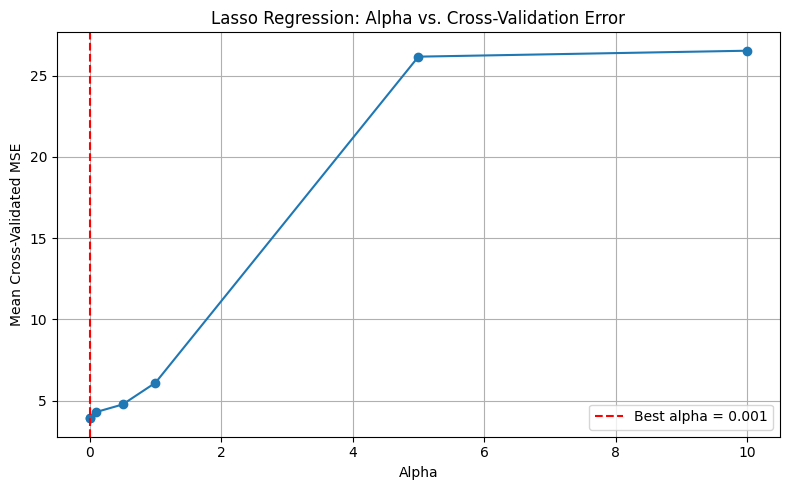

In [15]:
import matplotlib.pyplot as plt

# Plot alpha vs. cross-validated MSE
plt.figure(figsize=(8, 5))
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1), marker='o', linestyle='-')
plt.axvline(lasso_cv.alpha_, color='red', linestyle='--', label=f'Best alpha = {lasso_cv.alpha_}')
plt.xlabel('Alpha')
plt.ylabel('Mean Cross-Validated MSE')
plt.title('Lasso Regression: Alpha vs. Cross-Validation Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 📈** Interpretation of the Plot**

* **X-axis**: Different alpha values tried (`0.001` to `10`)
* **Y-axis**: Average cross-validated MSE (error) for each alpha

### 🔴 Red dashed line: `Best alpha = 0.001`

* At this point, the **cross-validation error is lowest**
* So, **minimal regularization works best** in your case

---

### 🧠 What It Tells Us:

* As alpha increases, **error increases**
* High alpha (like `5` or `10`) results in **underfitting** — model too simplified
* Small alpha (`0.001`) keeps enough flexibility while still applying light regularization

✅ Your model needs **low regularization** because most features are **useful and not noisy**

---




# **Step 6: Save and Export the Trained Lasso Model**

This step is essential so you can:

* ✅ Reuse the model later (no need to retrain)
* ✅ Share it on GitHub or deploy it into an app
* ✅ Keep your preprocessing + model bundled together

---

## 🧠 What we'll Save

1. The **Lasso model** (`lasso_cv`)
2. The **preprocessing pipeline** (`preprocessor`)
3. Optionally, save both in a single **pipeline** object

---




In [16]:
import joblib

# Save the best Lasso model from LassoCV
joblib.dump(lasso_cv, "LassoReg_CarReSalePrice_model.pkl")

# Save the preprocessing pipeline
joblib.dump(preprocessor, "LassoReg_CarReSalePrice_preprocessor.pkl")

# ✅ Optional: Combine both into a pipeline and save together
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("lasso", lasso_cv)
])

joblib.dump(full_pipeline, "LassoReg_CarReSalePrice_full_pipeline.pkl")
print("✅ Model and preprocessor saved successfully!")


✅ Model and preprocessor saved successfully!



## 📤 Now What?

Once saved, we can:

* ✅ Upload these `.pkl` files to **GitHub**
* ✅ Load them later using:

  ```python
  model = joblib.load("LassoReg_CarReSalePrice_full_pipeline.pkl")
  predictions = model.predict(new_data)
  ```
* ✅ Use them in web apps (e.g., Streamlit, Flask)

---